# Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt


# Load the dataset

In [2]:
df = pd.read_csv('patient_clustering.csv')


Pre-processing

In [3]:
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})  # Male: 0, Female: 1

X = df[['Gender', 'Weight', 'Height', 'BMI', 'Age', 'BloodPressure']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
df['ClusterLabel'] = kmeans.labels_

# Mapping the numeric cluster labels to meaningful names
# Assuming we map cluster 0 -> Normal, 1 -> Healthy, 2 -> Weak
cluster_mapping = {0: 'Normal', 1: 'Healthy', 2: 'Weak'}
df['ClusterLabel'] = df['ClusterLabel'].map(cluster_mapping)

c:\Users\mudit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


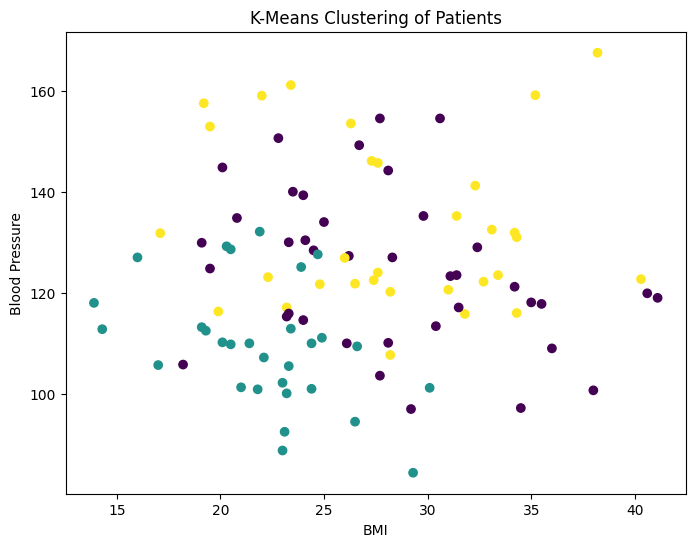

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(df['BMI'], df['BloodPressure'], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering of Patients')
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.show()

# Result

In [6]:
print(df[['Gender', 'Weight', 'Height', 'BMI', 'Age', 'BloodPressure', 'ClusterLabel']].head())

   Gender  Weight  Height   BMI  Age  BloodPressure ClusterLabel
0       0    40.4   146.5  33.4   38          123.5         Weak
1       1    64.2   153.6  31.4   36          123.5       Normal
2       1    59.1   153.4  14.3   36          112.8      Healthy
3       1    62.0   152.2  27.7   53          154.5       Normal
4       1    60.9   151.3  24.4   46          101.0      Healthy
